In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal and petal length/width)
y = iris.target  # Target classes (0=setosa, 1=versicolor, 2=virginica)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [8]:
# Step 2: Multiclass Logistic Regression (using all 3 classes)
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

C:\Users\SWARNABHA\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
# Step 3: Evaluate Multiclass Model
print("=== Multiclass Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_multi) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_multi, target_names=iris.target_names))

=== Multiclass Logistic Regression ===
Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



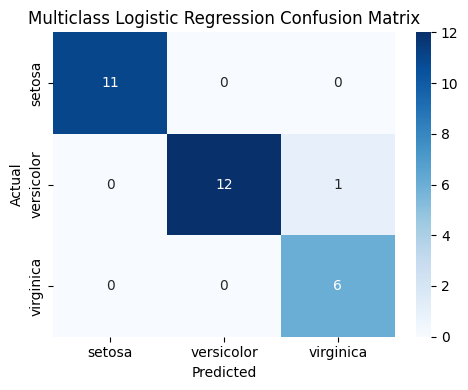

In [18]:
# Step 4: Visualize Confusion Matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(5, 4))

sns.heatmap(cm_multi, annot = True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
# cm_multi -> data
# ann0t -> True, to show the numbers in each cell
# fmt -> format, d for decimal, .2f for 2 decimal float, g for general
# xticklabels -> labels on x axis
# yticklabels -> labels on y axis


plt.title("Multiclass Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("iris_multiclass_confusion.png")
plt.show()

In [23]:
# Step 5: Binary Logistic Regression (only class 0 vs 1)
binary_filter = y < 2
X_binary = X[binary_filter]
y_binary = y[binary_filter]

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=1)


binary_model = LogisticRegression(solver='lbfgs')
binary_model.fit(X_binary_train, y_binary_train)
y_pred_binary = binary_model.predict(X_binary_test)

In [24]:
# Step 6: Evaluate Binary Model
print("\n=== Binary Logistic Regression (Setosa vs Versicolor) ===")
print(f"Accuracy: {accuracy_score(y_binary_test, y_pred_binary) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_binary_test, y_pred_binary, target_names=iris.target_names[:2]))


=== Binary Logistic Regression (Setosa vs Versicolor) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



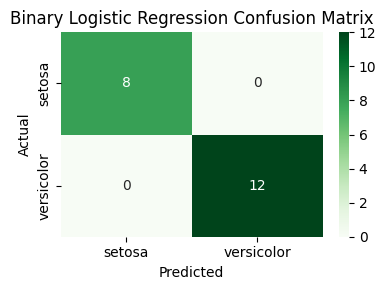

In [25]:
# Step 7: Binary Confusion Matrix
cm_binary = confusion_matrix(y_binary_test, y_pred_binary)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_binary, annot=True, cmap='Greens', fmt='d',
            xticklabels=iris.target_names[:2],
            yticklabels=iris.target_names[:2])
plt.title("Binary Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("iris_binary_confusion.png")
plt.show()

### classify using binary classifier, after converting the multiclass problem into binary by using PCA

In [33]:
X1 = iris.data # 2D array
y1 = iris.target #1D np array

In [34]:
print(X1.shape)
print(y1.shape)

(150, 4)
(150,)


In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [38]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [40]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X1_train2D = pca.fit_transform(X1_train)
X1_test2D = pca.transform(X1_test)

In [41]:
print(X1_train2D.shape)
print(X1_test2D.shape)
print(y1_train.shape)
print(y1_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [43]:
# Logistic Regression

pca_binary_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

pca_binary_model.fit(X1_train2D, y1_train)

y1_pred2D = pca_binary_model.predict(X1_train2D)

In [45]:
accuracy1_2d = accuracy_score(y1_train, y1_pred2D)

print(accuracy1_2d)

0.7083333333333334
